In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision

In [2]:
ADNI1_Complete_1Yr = pd.read_csv("ADNI1_Complete_1Yr_1.5T_10_06_2024.csv")
ADNI1_Complete_1Yr.head()

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,I88024,016_S_0991,AD,F,87,m12,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,12/13/2007,NiFTI,NaN
1,I32237,011_S_0003,AD,M,81,sc,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,9/01/2005,NiFTI,NaN
2,I80689,116_S_0487,AD,M,78,m12,MRI,MPR; GradWarp; N3; Scaled,Processed,6/18/2007,NiFTI,NaN
3,I58022,051_S_1296,AD,M,77,sc,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,2/12/2007,NiFTI,NaN
4,I112461,141_S_0852,AD,F,85,m06,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,4/25/2007,NiFTI,NaN


In [3]:
ADNI1_Complete_1Yr.describe()

,Age,Downloaded
count,2294.000000,0.0
mean,75.638622,NaN
std,6.662227,NaN
min,55.000000,NaN
25%,72.000000,NaN
50%,76.000000,NaN
75%,80.000000,NaN
max,91.000000,NaN


# Plot AD vs CN sample values

In [4]:
ADNI1_Complete_1Yr["Group"].value_counts()

Group
MCI    1113
CN      705
AD      476
Name: count, dtype: int64

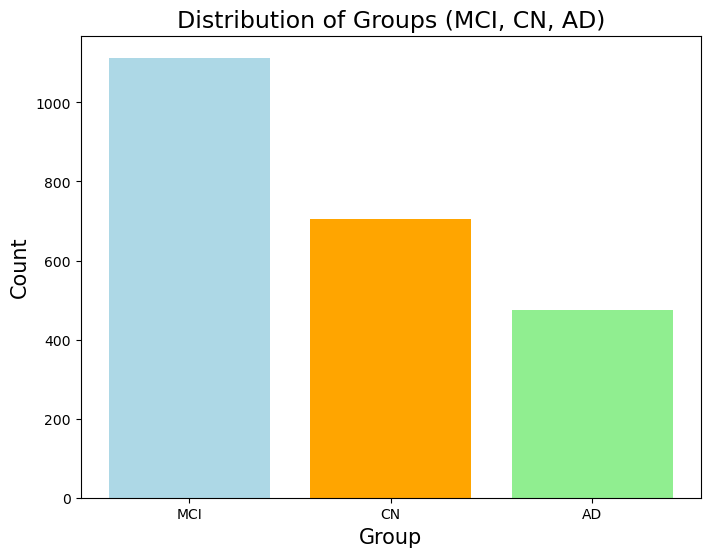

In [104]:
plt.figure(figsize=(8, 6))
plt.subplot()

plt.bar(ADNI1_Complete_1Yr["Group"].value_counts().index, 
        ADNI1_Complete_1Yr["Group"].value_counts().values,
        color=['lightblue', 'orange', "lightgreen"])
# Add title and labels
plt.title('Distribution of Groups (MCI, CN, AD)', fontsize=17)
plt.xlabel('Group', fontsize=15)
plt.ylabel('Count', fontsize=15)

#Save figure
plt.savefig("Distribution_of_Groups_(MCI, CN, AD).pdf", format="pdf", bbox_inches="tight")

# Display the plot
plt.show()

# Plot Age Distribution

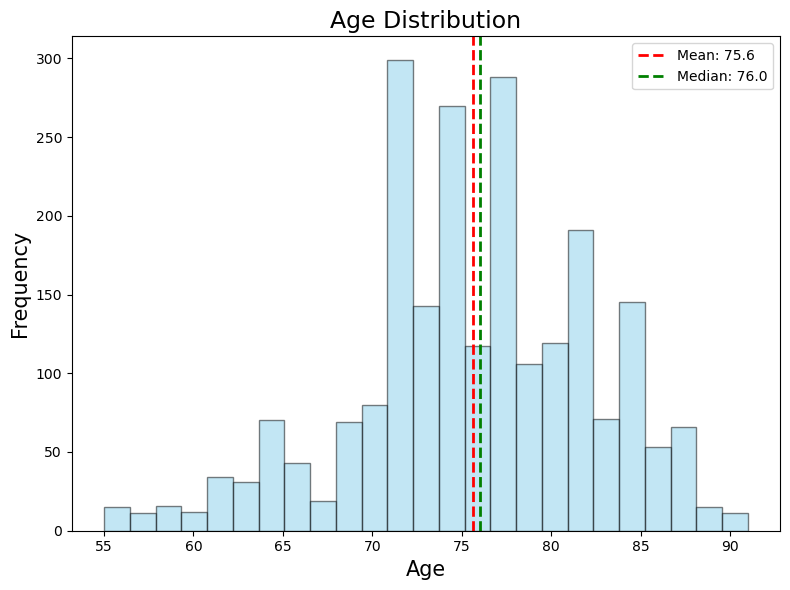

In [105]:
plt.figure(figsize=(8, 6))
# Plot the histogram
plt.hist(ADNI1_Complete_1Yr['Age'], bins=25, color='skyblue', edgecolor='black', alpha=0.5)

# Add vertical line at the mean age
mean_age = ADNI1_Complete_1Yr['Age'].mean()
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_age:.1f}')

# Add vertical line at the median age
median_age = ADNI1_Complete_1Yr['Age'].median()
plt.axvline(median_age, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_age:.1f}')

# Add title and labels
plt.title('Age Distribution', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

# Show legend
plt.legend()
plt.tight_layout()
plt.savefig("Age_Distribution.pdf", format="pdf", bbox_inches="tight")
# Display the plot
plt.show()

## Plot Age Distribution again with it split with groups

C:\Users\Josh\AppData\Local\Temp\ipykernel_21668\3152935382.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = ADNI1_Complete_1Yr.groupby(['Age Range', 'Group']).size().unstack(fill_value=0)


<Figure size 800x600 with 0 Axes>

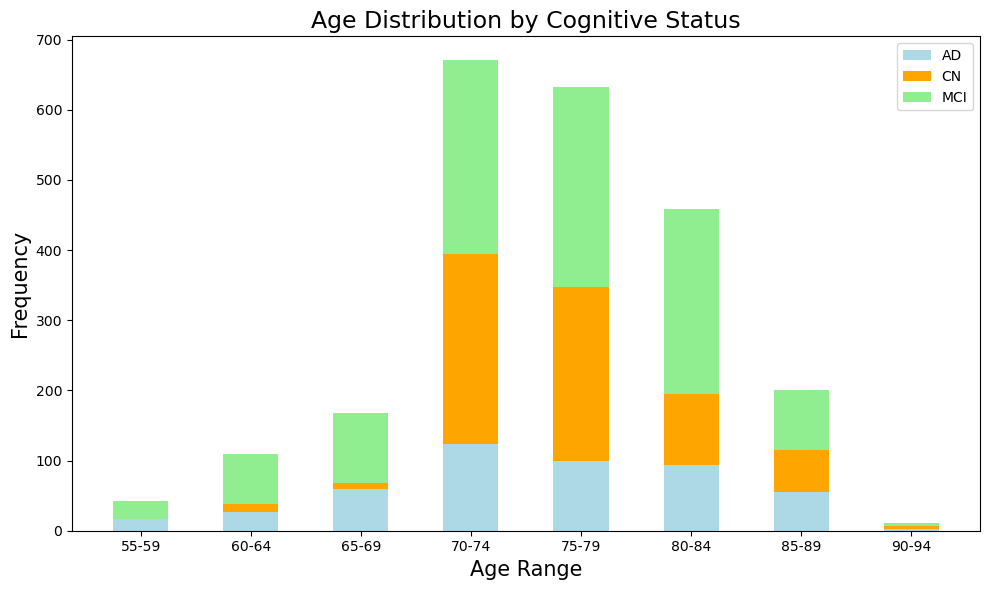

In [106]:
plt.figure(figsize=(8, 6))
# Define age ranges
age_bins = range(55, 100, 5)  # Ranges from 55 to 80 with step size of 5
age_labels = [f"{age_bins[i]}-{age_bins[i+1]-1}" for i in range(len(age_bins) - 1)]

# Bin the ages into ranges
ADNI1_Complete_1Yr['Age Range'] = pd.cut(ADNI1_Complete_1Yr['Age'], bins=age_bins, labels=age_labels, right=False)

# Count the occurrences of each group within each age range
grouped_data = ADNI1_Complete_1Yr.groupby(['Age Range', 'Group']).size().unstack(fill_value=0)

# Prepare data for the stacked bar chart
age_ranges = grouped_data.index
AD_counts = grouped_data['AD']
CN_counts = grouped_data['CN']
MCI_counts = grouped_data['MCI']

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(age_ranges, AD_counts, label='AD',color='lightblue', width=0.5)
plt.bar(age_ranges, CN_counts, bottom=AD_counts, label='CN', color='orange',  width=0.5)
plt.bar(age_ranges, MCI_counts, bottom=AD_counts + CN_counts, label='MCI', color='lightgreen',  width=0.5)

# Add title and labels
plt.title('Age Distribution by Cognitive Status', fontsize=17)
plt.xlabel('Age Range', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.legend()

# Save and display
plt.tight_layout()
# Uncomment to save the figure
plt.savefig("Age_distribution_by_cognitive_status.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Plot Group vs Sex Distribution

<Figure size 800x600 with 0 Axes>

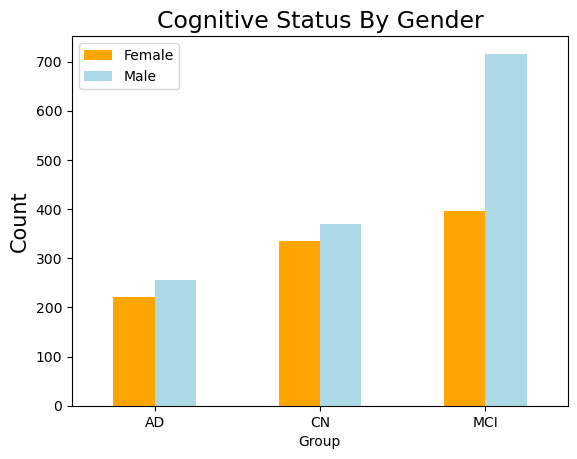

In [121]:
plt.figure(figsize=(8, 6))
# Create a crosstab for cognitive status by sex, using the 'Group' and 'Sex' columns
crosstab = pd.crosstab(ADNI1_Complete_1Yr['Group'], ADNI1_Complete_1Yr['Sex'])

# Plot grouped bar chart
crosstab.plot(kind='bar', stacked=False, color=['orange', 'lightblue'])

# Add title and labels
plt.title('Cognitive Status By Gender', fontsize=17)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=0)

# Add a legend
plt.legend(labels=['Female', 'Male'])

# Save the plot to a PDF file
plt.savefig("cognitive_status_by_gender.pdf", format="pdf", bbox_inches="tight")

# Display the plot
plt.show();

## Sex Distribution

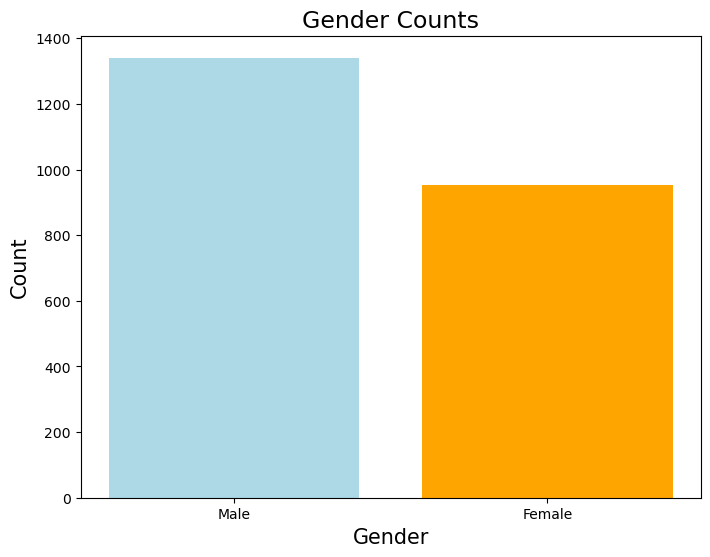

In [110]:
male_count = len(ADNI1_Complete_1Yr[ADNI1_Complete_1Yr['Sex'] == 'M'])
female_count = len(ADNI1_Complete_1Yr[ADNI1_Complete_1Yr['Sex'] == 'F'])

plt.figure(figsize=(8, 6))
plt.subplot()

plt.bar(['Male', 'Female'],
        [male_count, female_count],
        color=['lightblue', 'orange'])

plt.title('Gender Counts', fontsize=17)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.savefig("gender_counts.pdf", format="pdf", bbox_inches="tight")
plt.show();

# Plot the Distribution of Acquisition Dates

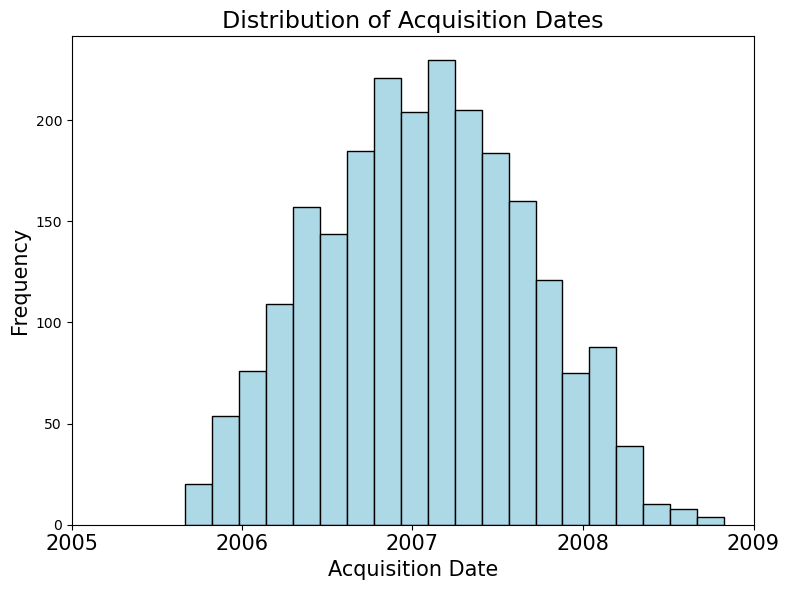

In [114]:
# Convert 'Acq Date' to datetime format (assuming this is already done in your dataset)
ADNI1_Complete_1Yr['Acq Date'] = pd.to_datetime(ADNI1_Complete_1Yr['Acq Date'])

plt.figure(figsize=(8, 6))

# Plot the histogram of acquisition dates
plt.hist(ADNI1_Complete_1Yr['Acq Date'], bins=20, color='lightblue', edgecolor='black')

# Add title and labels
plt.title('Distribution of Acquisition Dates', fontsize=17)
plt.xlabel('Acquisition Date', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

# Custom x-axis ticks (datetime objects)
custom_ticks = pd.to_datetime(['2005-01-01', '2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01'])
custom_labels = ['2005', '2006', '2007', '2008', '2009']

ax = plt.gca()
ax.set_xticks(custom_ticks)  # Set the tick positions
ax.set_xticklabels(custom_labels, fontsize=15)  # Set the custom labels

plt.tight_layout()
# Uncomment the next line to save the figure as a PDF
plt.savefig("acquisition_dates.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [12]:
import numpy as np
age_mean = ADNI1_Complete_1Yr['Age'].mean()
age_1srd = np.std(ADNI1_Complete_1Yr['Age'])
age_mean, age_1srd

(75.6386224934612, 6.660774650101967)

## Count how many scans subjects have

In [13]:
len(ADNI1_Complete_1Yr['Subject'].unique())

639

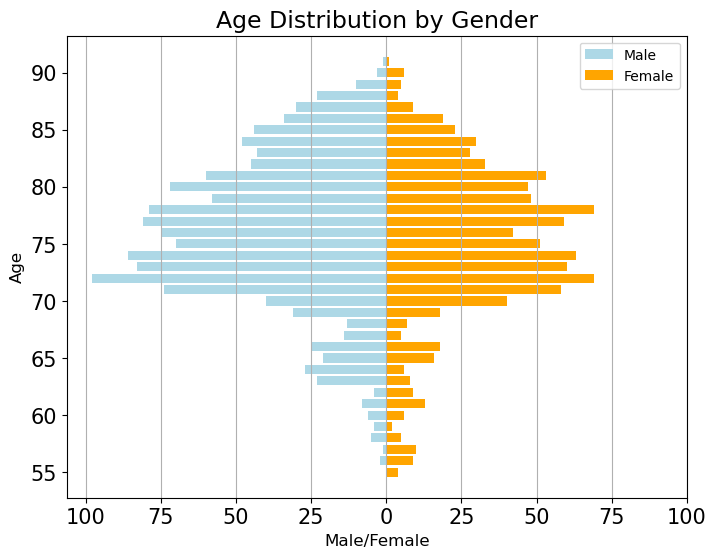

In [112]:
male_counts = ADNI1_Complete_1Yr[ADNI1_Complete_1Yr['Sex'] == 'M'].groupby('Age').size()
female_counts = ADNI1_Complete_1Yr[ADNI1_Complete_1Yr['Sex'] == 'F'].groupby('Age').size()

# Set up pyramid plot
plt.figure(figsize=(8, 6))
plt.barh(male_counts.index, -male_counts.values, color='lightblue', label='Male')
plt.barh(female_counts.index, female_counts.values, color='orange', label='Female')

# Add labels and title
plt.title('Age Distribution by Gender', fontsize=17)
plt.xlabel('Male/Female', fontsize=12, loc="center")
plt.ylabel('Age', fontsize=12)
plt.legend()

plt.xticks(ticks=[-100, -75, -50, -25, 0, 25, 50, 75, 100], 
           labels=['100', '75', '50', '25', '0', '25', '50', '75', '100'], fontsize=15)
plt.yticks(fontsize=15)

plt.grid(axis='x')
# Save and display the plot
plt.savefig("age_distribution_by_gender.pdf", format="pdf", bbox_inches="tight")
plt.show()